# PROJECT 2


## Incompressible Fluid Flow

This is a demo of the flow of an incompressible fluid, modeled using the finite-differencing techniques we've been using for the diffusion equation. 


Two, coupled equations govern incompressible fluid flow of the sort we're modeling here:

$$
\Large 
\vec{\nabla} \cdot \vec{v} = 0 \\
\Large
{\partial v \over \partial t} = - \left( \vec{v} \cdot \vec{\nabla} \right) \vec{v} + \nu \nabla^2 \vec{v} + \vec{g}
$$

These equations assume constant pressure throughout the fluid. 

The fluid velocities are the quantity of interest. These are: 
$$
\Large
\vec{v} = (v_x, v_y)
$$

The vector $\vec{\nabla}$ is:
$$
\large
\vec{\nabla} = \left({\partial \over \partial x}, {\partial \over \partial y} \right)
$$

and 

$$
\large
\nabla^2 = \vec{\nabla} \cdot \vec{\nabla}
$$

Finally, $\vec{g}$ is an external acceleration on the fluid.

### Terms:

The first equation says the fluid cannot compress: velocities must *never* converge or diverge. 

The second equation governs the time evolution of the fluid velocities. 

These velocities (defined at a given position) can respond to several terms:
1. **Advection:** $ - \left( \vec{v} \cdot \vec{\nabla} \right) \vec{v}$  advection is the transport of fluid velocities by the flow velocity itself: tracers or velocities themselves can be "swept along" by the flow. Imagine a cork drifting with a fluid flow -- or a eddie being carried downstream by the bulk flow of a river. 

2. **Diffusion:** $\nu \nabla^2 \vec{v}$ We've covered this one in detail in the past few days. Diffusion disperses the fluid velocities based on the diffusion coefficient $\nu$. A very viscous fluid (like magma or mollases has high $\nu$, and this term is very important. A very low-viscosity fluid (like air, or gas in the sun) has low $\nu$. This term tries to smooth out neighboring velocities. 

3. **External force:** $\vec{g}$ There may be an external acceleration (like gravity) acting on the fluid. 

### Method:

The code solves the fluid equations using the method described here:
http://www.dgp.toronto.edu/people/stam/reality/Research/pdf/ns.pdf

# On running this code:

To run this code, download FluidCode.py and place it in the same folder as this notebook. 

# PART A)
A)  Kevin Helmgoltz instanbility flow has 4 examples: 1) Wind over water 2) Clouds and the air 3)Suns corona 
4) Saturns atmospheres layerd over each other.
https://en.wikipedia.org/wiki/Kelvin%E2%80%93Helmholtz_instability

<Origin/Result>
So when two fluids dont homogenously mix at different velocity for exmaple two clouds or air layers are seperately uniform in velocity and density within each independent layer. However where they meet there is a discontinouty 
as a result, the interface becomes an unstable vortex sheet that rolls up into a spiral. In nature, Ocean mixing in meteorology (Smyth and Moum 2012), motion of interstellar clouds (Murray et al. 1993, Vietri et al. 1997) and clumping in supernova remnants (Wang and Chevalier 2001) in astrophysics, production of unstable shear layer and vortices in high energy density plasmas (Harding et al. 2009, Hurricane et al. 2009), and quantized vortices in quantum fluids (Blaauwgeers et al. 2002, Takeuchi et al. 2010), etc. are given as such examples.

http://www.scholarpedia.org/article/Kelvin-Helmholtz_Instability_and_Roll-up

So vortices form in a inconsestent pattern or manner. A good visual can be a dye drop mixed into water and as the dye mixes with the water vorticies form similar to Kelvin-Helmholtz Instability.

# PART B)

In [1]:
# importing our fluid solver code (saved in FluidCode.py)
import FluidCode as fluid


# IMPORT OUR NORMAL STUFF
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline






In [2]:
# Make a local instance of the FluidFlow2D class contained in the FluidFlow.py file
# these are optional parameters which can be changed

f = fluid.FluidFlow2D(ncells=80, xmin=-50, xmax=50,
                     solver_tolerence=3.e-4)



In [3]:
# To get help, we can use the ?

#f.get_coords?

In [4]:
# Or look at the source 

source(f.get_coords)

In file: FluidCode.py

    def get_coords(self):
        """ returns the 2D coordinate meshes xx,yy for the grid """
        return self.xx, self.yy



In [5]:
# OR, just open the FluidCode.py file

## Setting Up Initial Conditions

In the cell below, we set up initial conditions. 

The velocities are set to zero everywhere, and the density is set to 2 above a wiggly interface near y=0. 

... project converged after 1  steps


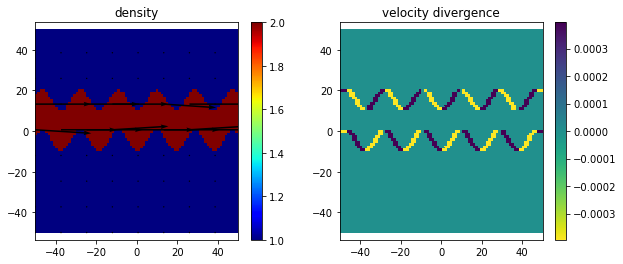


... speed_lim dt= 632.911392405  accel_lim dt= inf  diff_lim dt= 200.288415318 new dt = 2.0
Taking step 0  with dt= 2.0 time= 0.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps


FluidCode.py:329: RuntimeWarning: divide by zero encountered in double_scalars
  dtTest_acc   =  acc_limiter * sqrt(2.0*dx/self.external_acceleration(amax(self.dno)) )


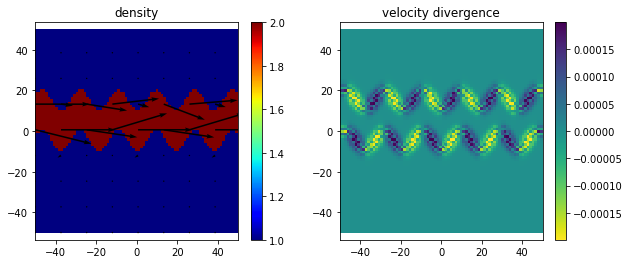


... speed_lim dt= 554.385652647  accel_lim dt= inf  diff_lim dt= 200.288415318 new dt = 4.0
Taking step 1  with dt= 4.0 time= 2.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 505.838923268  accel_lim dt= inf  diff_lim dt= 200.288415318 new dt = 8.0
Taking step 2  with dt= 8.0 time= 6.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 482.807837494  accel_lim dt= inf  diff_lim dt= 200.288415318 new dt = 16.0
Taking step 3  with dt= 16.0 time= 14.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 473.540607687  accel_lim dt= inf  diff_lim dt= 200.288415318 new dt = 32.0
Taking step 4  with dt= 32.0 time= 30.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 477.520

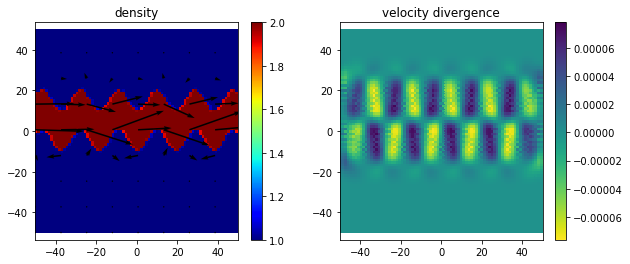

In [6]:
f = fluid.FluidFlow2D(ncells=80, xmin=-50, xmax=50,
                     solver_tolerence=3.e-4)

# gets the coordinate arrays
xx, yy = f.get_coords()

# setup an initial condition
vxo = zeros_like(xx)
vyo = zeros_like(xx)
dno = ones_like(xx)

# set higher density on the top
dno[yy > 2*sin(xx/6)**2 ] = 1
dno[yy < 10*sin(xx/6)**2 +10] = 2
dno[yy < 10*sin(xx/6)**2 -10]= 1
vxo[yy < 2*sin(xx/6)**2 ] = 0.001
vxo[yy < 10*sin(xx/6)**2 -10] = 0
vxo[yy > 2*sin(xx/6)**2 ] = 0.001
vxo[yy > 10*sin(xx/6)**2 +10] = 0

# send this initial condition to the code
diff_coeff = 0.001
f.setup_initial_condition(vxo, vyo, dno, Diff_Coeff=diff_coeff, bctype='wrap')

f.make_monitoring_plots(velocity_vectors=True)

vxlist = []
vylist = []
dnlist = []
f.evolve_fluid(vxlist, vylist, dnlist, tmax = 100, plot_every=10, save_every = 10, bctype= 'wrap')
#import/open new fluid code with new external force slot (will be uploaded after class)

# PART B) CONT.

# External Forces

... project converged after 3  steps


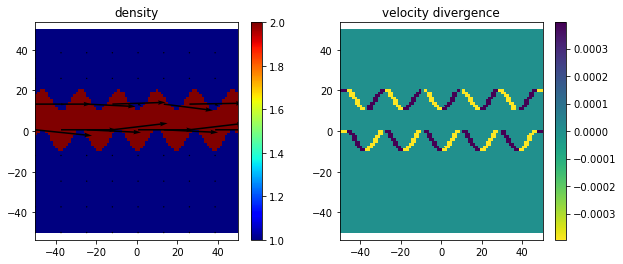


... speed_lim dt= 602.32459649  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 2.0
Taking step 0  with dt= 2.0 time= 0.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps


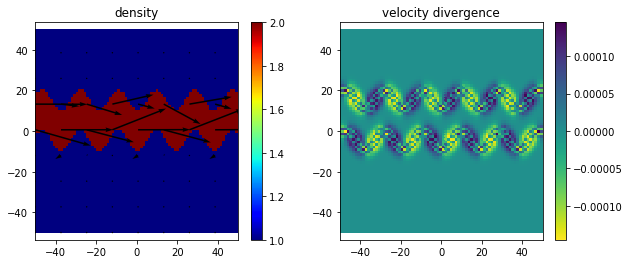


... speed_lim dt= 516.118874404  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 4.0
Taking step 1  with dt= 4.0 time= 2.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 477.460903484  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 8.0
Taking step 2  with dt= 8.0 time= 6.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 463.697372093  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 16.0
Taking step 3  with dt= 16.0 time= 14.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 460.817029436  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 32.0
Taking step 4  with dt= 32.0 time= 30.0
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 469.302

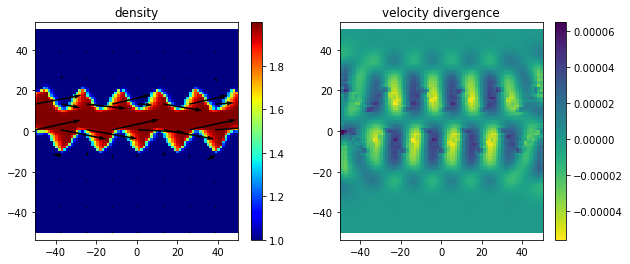


... speed_lim dt= 555.650649098  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 555.650649098
Taking step 11  with dt= 555.650649098 time= 2127.28524589
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 552.825530391  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 552.825530391
Taking step 12  with dt= 552.825530391 time= 2682.93589499
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 556.068709612  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 556.068709612
Taking step 13  with dt= 556.068709612 time= 3235.76142538
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 562.538755895  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 562.538755895
Taking step 14  with dt= 562.538755895 time= 3791.830135
... project converged

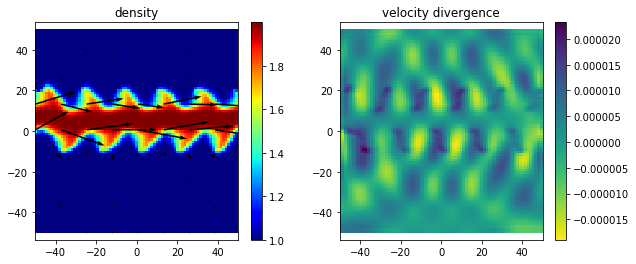


... speed_lim dt= 604.395495662  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 604.395495662
Taking step 21  with dt= 604.395495662 time= 7872.88400342
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 606.086213285  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 606.086213285
Taking step 22  with dt= 606.086213285 time= 8477.27949909
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 608.363218975  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 608.363218975
Taking step 23  with dt= 608.363218975 time= 9083.36571237
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 610.611320428  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 610.611320428
Taking step 24  with dt= 610.611320428 time= 9691.72893135
... project converg

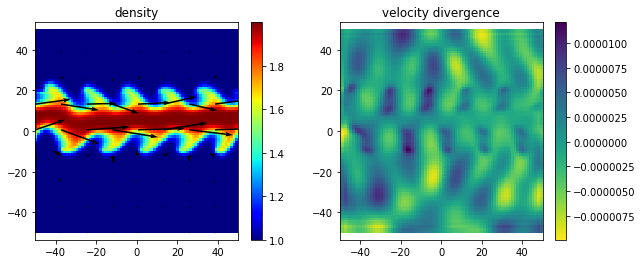


... speed_lim dt= 622.285147133  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 622.285147133
Taking step 31  with dt= 622.285147133 time= 14001.6632667
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 623.82305439  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 623.82305439
Taking step 32  with dt= 623.82305439 time= 14623.9484138
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 625.595245598  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 625.595245598
Taking step 33  with dt= 625.595245598 time= 15247.7714682
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 627.818922226  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 627.818922226
Taking step 34  with dt= 627.818922226 time= 15873.3667138
... project converged 

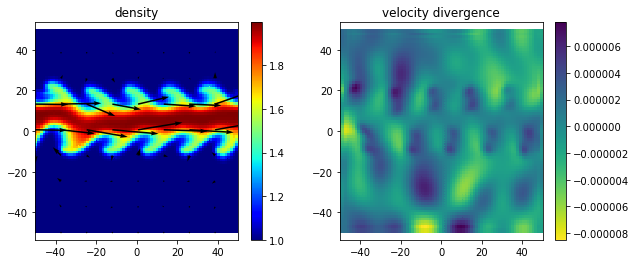


... speed_lim dt= 644.164211708  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 644.164211708
Taking step 41  with dt= 644.164211708 time= 20313.2810536
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 646.487643904  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 646.487643904
Taking step 42  with dt= 646.487643904 time= 20957.4452653
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 649.142052375  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 649.142052375
Taking step 43  with dt= 649.142052375 time= 21603.9329092
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 651.712996772  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 651.712996772
Taking step 44  with dt= 651.712996772 time= 22253.0749616
... project converg

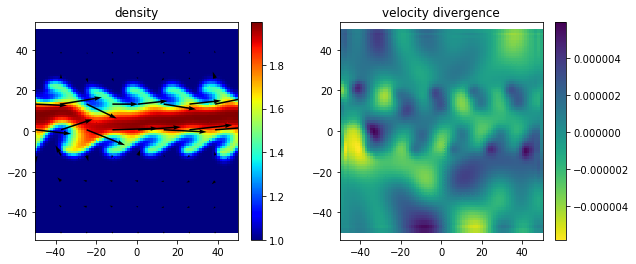


... speed_lim dt= 671.811435886  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 671.811435886
Taking step 51  with dt= 671.811435886 time= 26871.6392881
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 675.093073463  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 675.093073463
Taking step 52  with dt= 675.093073463 time= 27543.450724
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 678.374201418  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 678.374201418
Taking step 53  with dt= 678.374201418 time= 28218.5437975
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 681.412490363  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 681.412490363
Taking step 54  with dt= 681.412490363 time= 28896.9179989
... project converge

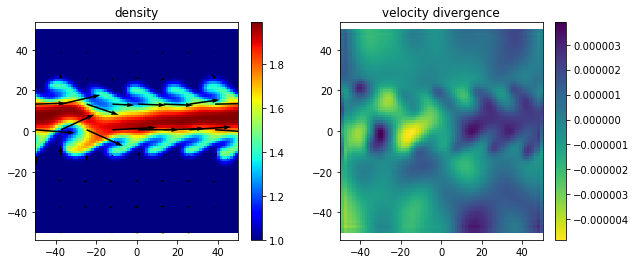


... speed_lim dt= 690.207797768  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 690.207797768
Taking step 61  with dt= 690.207797768 time= 33705.7501073
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 690.693966607  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 690.693966607
Taking step 62  with dt= 690.693966607 time= 34395.9579051
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 691.389155554  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 691.389155554
Taking step 63  with dt= 691.389155554 time= 35086.6518717
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 692.394603304  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 692.394603304
Taking step 64  with dt= 692.394603304 time= 35778.0410273
... project converg

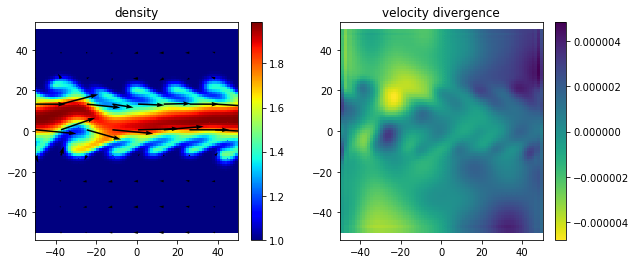


... speed_lim dt= 702.548748019  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 702.548748019
Taking step 71  with dt= 702.548748019 time= 40653.6138402
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 703.965854544  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 703.965854544
Taking step 72  with dt= 703.965854544 time= 41356.1625882
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 705.306471063  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.306471063
Taking step 73  with dt= 705.306471063 time= 42060.1284428
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 706.354566511  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 706.354566511
Taking step 74  with dt= 706.354566511 time= 42765.4349138
... project converg

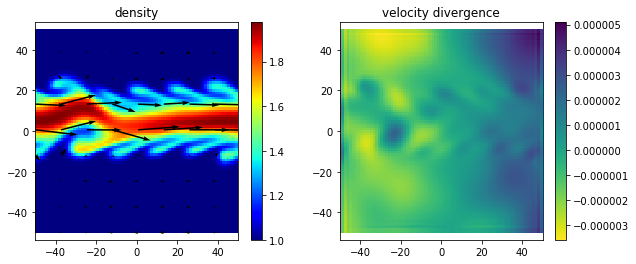


... speed_lim dt= 706.625090495  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 706.625090495
Taking step 81  with dt= 706.625090495 time= 47718.1576966
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 705.966206828  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.966206828
Taking step 82  with dt= 705.966206828 time= 48424.782787
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 705.394756149  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.394756149
Taking step 83  with dt= 705.394756149 time= 49130.7489939
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 704.992061427  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 704.992061427
Taking step 84  with dt= 704.992061427 time= 49836.14375
... project converged 

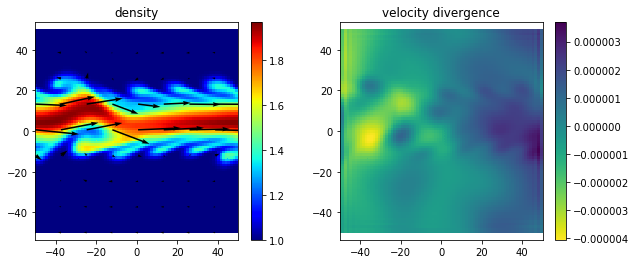


... speed_lim dt= 707.411668229  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 707.411668229
Taking step 91  with dt= 707.411668229 time= 54774.5812141
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 707.933349309  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 707.933349309
Taking step 92  with dt= 707.933349309 time= 55481.9928823
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 708.351348204  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 708.351348204
Taking step 93  with dt= 708.351348204 time= 56189.9262316
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 708.639552376  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 708.639552376
Taking step 94  with dt= 708.639552376 time= 56898.2775798
... project converg

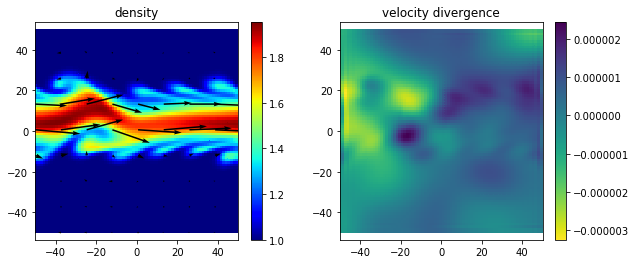


... speed_lim dt= 707.029450552  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 707.029450552
Taking step 101  with dt= 707.029450552 time= 61856.9646204
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 706.500107136  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 706.500107136
Taking step 102  with dt= 706.500107136 time= 62563.994071
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 705.96452213  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.96452213
Taking step 103  with dt= 705.96452213 time= 63270.4941781
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 705.446318395  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.446318395
Taking step 104  with dt= 705.446318395 time= 63976.4587002
... project converg

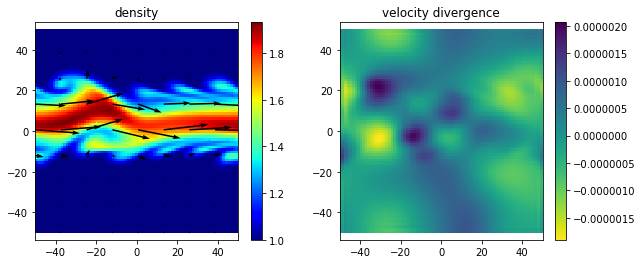


... speed_lim dt= 703.248175564  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 703.248175564
Taking step 111  with dt= 703.248175564 time= 68906.3062851
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 703.162737601  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 703.162737601
Taking step 112  with dt= 703.162737601 time= 69609.5544606
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 703.11173507  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 703.11173507
Taking step 113  with dt= 703.11173507 time= 70312.7171982
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 703.000294364  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 703.000294364
Taking step 114  with dt= 703.000294364 time= 71015.8289333
... project conver

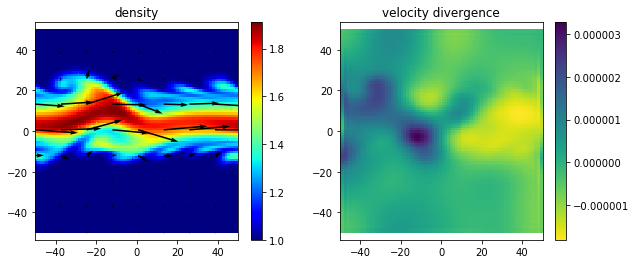


... speed_lim dt= 702.147356193  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 702.147356193
Taking step 121  with dt= 702.147356193 time= 75934.862783
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 701.83883217  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 701.83883217
Taking step 122  with dt= 701.83883217 time= 76637.0101392
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 701.521364807  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 701.521364807
Taking step 123  with dt= 701.521364807 time= 77338.8489713
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 701.248921881  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 701.248921881
Taking step 124  with dt= 701.248921881 time= 78040.3703361
... project converg

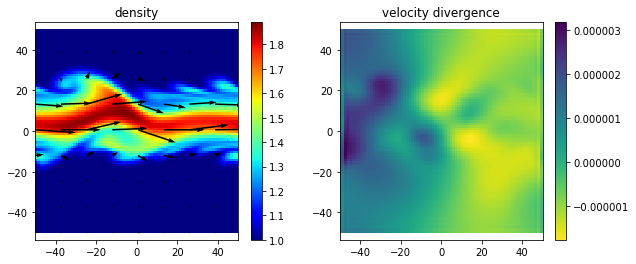


... speed_lim dt= 698.082388357  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 698.082388357
Taking step 131  with dt= 698.082388357 time= 82942.8034517
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 697.580075459  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 697.580075459
Taking step 132  with dt= 697.580075459 time= 83640.88584
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 697.223012124  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 697.223012124
Taking step 133  with dt= 697.223012124 time= 84338.4659155
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 696.87698307  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 696.87698307
Taking step 134  with dt= 696.87698307 time= 85035.6889276
... project converge

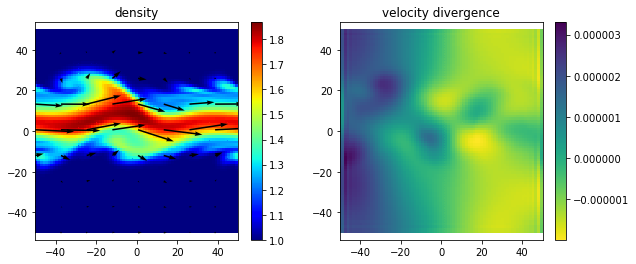


... speed_lim dt= 696.884727891  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 696.884727891
Taking step 141  with dt= 696.884727891 time= 89911.8971408
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 697.12733125  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 697.12733125
Taking step 142  with dt= 697.12733125 time= 90608.7818687
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 697.338584557  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 697.338584557
Taking step 143  with dt= 697.338584557 time= 91305.9092
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 697.600159386  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 697.600159386
Taking step 144  with dt= 697.600159386 time= 92003.2477845
... project converged

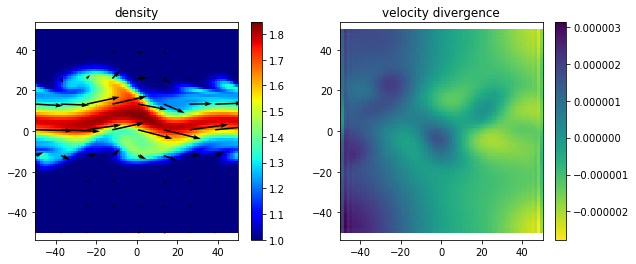


... speed_lim dt= 700.125883056  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 700.125883056
Taking step 151  with dt= 700.125883056 time= 96893.5858806
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 700.539815511  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 700.539815511
Taking step 152  with dt= 700.539815511 time= 97593.7117636
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 700.9732505  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 700.9732505
Taking step 153  with dt= 700.9732505 time= 98294.2515792
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 701.432397989  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 701.432397989
Taking step 154  with dt= 701.432397989 time= 98995.2248297
... project converged

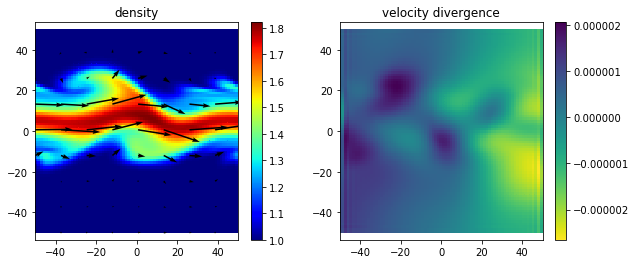


... speed_lim dt= 705.938903273  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 705.938903273
Taking step 161  with dt= 705.938903273 time= 103917.328648
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 706.798592717  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 706.798592717
Taking step 162  with dt= 706.798592717 time= 104623.267551
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 707.712882668  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 707.712882668
Taking step 163  with dt= 707.712882668 time= 105330.066144
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 708.680472905  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 708.680472905
Taking step 164  with dt= 708.680472905 time= 106037.779026
... project con

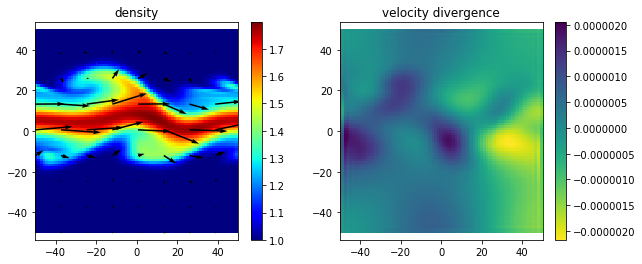


... speed_lim dt= 716.332230871  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 716.332230871
Taking step 171  with dt= 716.332230871 time= 111020.760623
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 717.550405806  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 717.550405806
Taking step 172  with dt= 717.550405806 time= 111737.092854
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 718.778081351  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 718.778081351
Taking step 173  with dt= 718.778081351 time= 112454.643259
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 720.100806892  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 720.100806892
Taking step 174  with dt= 720.100806892 time= 113173.421341
... project con

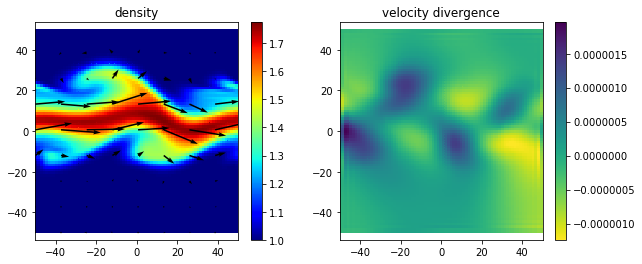


... speed_lim dt= 731.094649745  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 731.094649745
Taking step 181  with dt= 731.094649745 time= 118245.924467
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 732.869358676  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 732.869358676
Taking step 182  with dt= 732.869358676 time= 118977.019117
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 734.762543303  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 734.762543303
Taking step 183  with dt= 734.762543303 time= 119709.888475
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 736.68635471  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 736.68635471
Taking step 184  with dt= 736.68635471 time= 120444.651019
... project conver

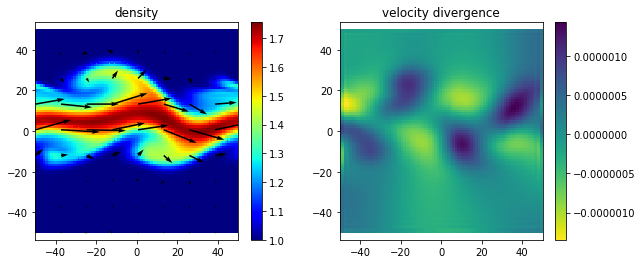


... speed_lim dt= 750.681967327  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 750.681967327
Taking step 191  with dt= 750.681967327 time= 125643.162084
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 752.761736411  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 752.761736411
Taking step 192  with dt= 752.761736411 time= 126393.844052
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 754.799106889  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 754.799106889
Taking step 193  with dt= 754.799106889 time= 127146.605788
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 756.843335889  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 756.843335889
Taking step 194  with dt= 756.843335889 time= 127901.404895
... project con

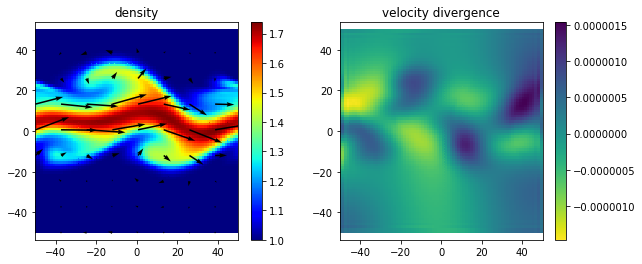


... speed_lim dt= 772.683885534  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 772.683885534
Taking step 201  with dt= 772.683885534 time= 133245.424663
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 775.253370721  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 775.253370721
Taking step 202  with dt= 775.253370721 time= 134018.108549
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 777.827867495  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 777.827867495
Taking step 203  with dt= 777.827867495 time= 134793.361919
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 780.433360145  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 780.433360145
Taking step 204  with dt= 780.433360145 time= 135571.189787
... project con

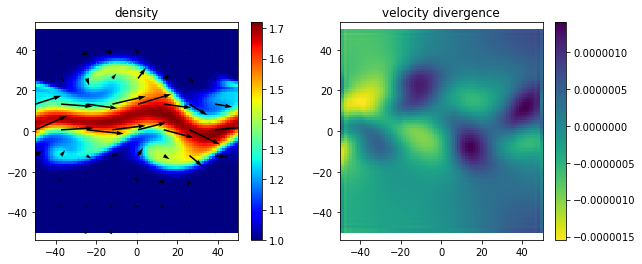


... speed_lim dt= 800.287461982  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 800.287461982
Taking step 211  with dt= 800.287461982 time= 141093.015752
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 803.290067109  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 803.290067109
Taking step 212  with dt= 803.290067109 time= 141893.303214
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 806.188776305  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 806.188776305
Taking step 213  with dt= 806.188776305 time= 142696.593281
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 809.08441505  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 809.08441505
Taking step 214  with dt= 809.08441505 time= 143502.782057
... project conver

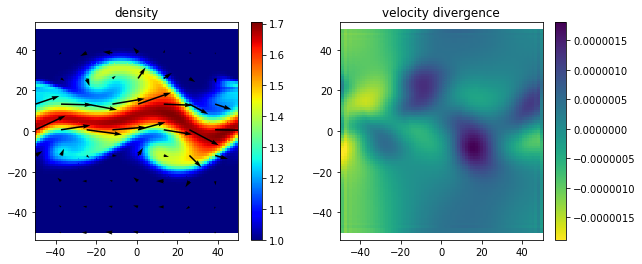


... speed_lim dt= 829.160211007  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 829.160211007
Taking step 221  with dt= 829.160211007 time= 149227.460355
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 831.958765484  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 831.958765484
Taking step 222  with dt= 831.958765484 time= 150056.620566
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 834.767093279  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 834.767093279
Taking step 223  with dt= 834.767093279 time= 150888.579331
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 837.375780629  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 837.375780629
Taking step 224  with dt= 837.375780629 time= 151723.346424
... project con

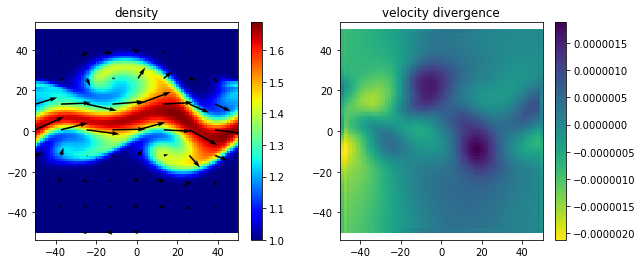


... speed_lim dt= 854.890074256  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 854.890074256
Taking step 231  with dt= 854.890074256 time= 157639.039154
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 857.044313762  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 857.044313762
Taking step 232  with dt= 857.044313762 time= 158493.929228
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 859.185017144  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 859.185017144
Taking step 233  with dt= 859.185017144 time= 159350.973542
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 861.314472131  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 861.314472131
Taking step 234  with dt= 861.314472131 time= 160210.158559
... project con

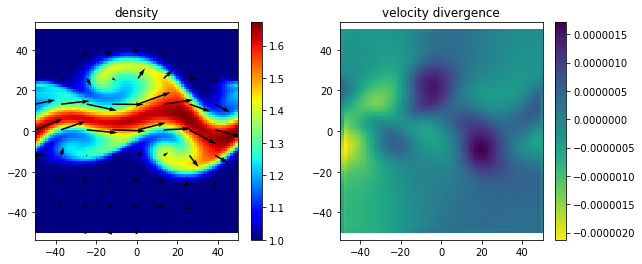


... speed_lim dt= 873.253326109  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 873.253326109
Taking step 241  with dt= 873.253326109 time= 166277.4661
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 874.754220552  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 874.754220552
Taking step 242  with dt= 874.754220552 time= 167150.719426
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 876.058081268  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 876.058081268
Taking step 243  with dt= 876.058081268 time= 168025.473647
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 877.324475262  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 877.324475262
Taking step 244  with dt= 877.324475262 time= 168901.531728
... project conve

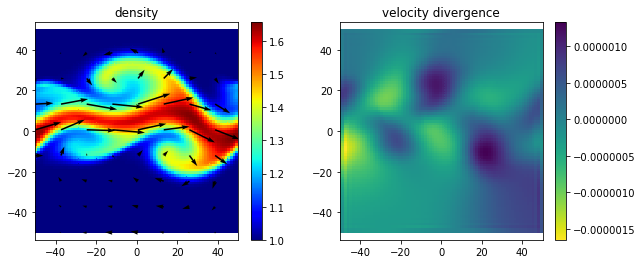


... speed_lim dt= 885.561992108  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 885.561992108
Taking step 251  with dt= 885.561992108 time= 175068.960639
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 886.617875326  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 886.617875326
Taking step 252  with dt= 886.617875326 time= 175954.522631
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 887.75095102  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 887.75095102
Taking step 253  with dt= 887.75095102 time= 176841.140506
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 888.971220469  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 888.971220469
Taking step 254  with dt= 888.971220469 time= 177728.891457
... project conver

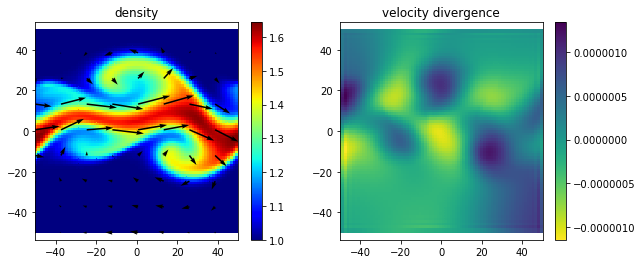


... speed_lim dt= 898.414988807  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 898.414988807
Taking step 261  with dt= 898.414988807 time= 183978.879161
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 899.975060762  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 899.975060762
Taking step 262  with dt= 899.975060762 time= 184877.294149
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 901.599770536  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 901.599770536
Taking step 263  with dt= 901.599770536 time= 185777.26921
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 903.126512278  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 903.126512278
Taking step 264  with dt= 903.126512278 time= 186678.868981
... project conv

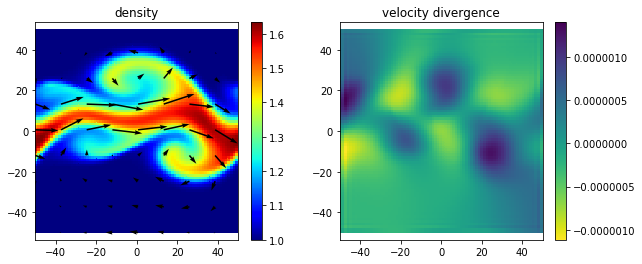


... speed_lim dt= 915.175185694  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 915.175185694
Taking step 271  with dt= 915.175185694 time= 193036.270015
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 916.959885821  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 916.959885821
Taking step 272  with dt= 916.959885821 time= 193951.445201
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 918.838487041  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 918.838487041
Taking step 273  with dt= 918.838487041 time= 194868.405087
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 920.713981352  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 920.713981352
Taking step 274  with dt= 920.713981352 time= 195787.243574
... project con

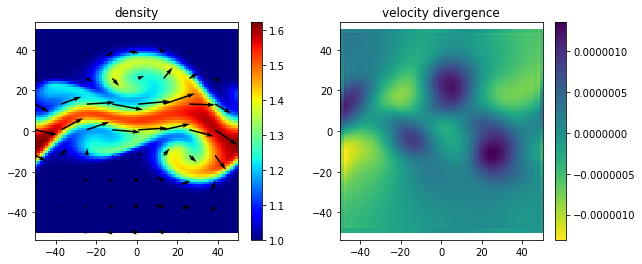


... speed_lim dt= 933.960919629  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 933.960919629
Taking step 281  with dt= 933.960919629 time= 202271.3644
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 935.791465109  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 935.791465109
Taking step 282  with dt= 935.791465109 time= 203205.325319
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 937.622167084  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 937.622167084
Taking step 283  with dt= 937.622167084 time= 204141.116784
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 939.525116722  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 939.525116722
Taking step 284  with dt= 939.525116722 time= 205078.738952
... project conve

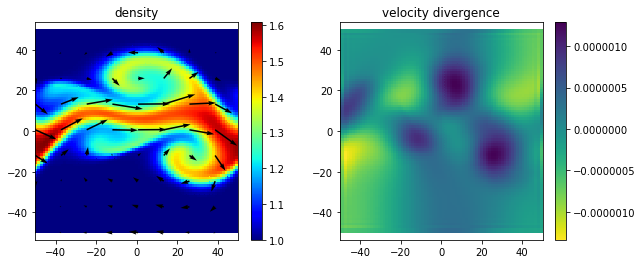


... speed_lim dt= 952.475142857  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 952.475142857
Taking step 291  with dt= 952.475142857 time= 211694.824092
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 954.335171334  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 954.335171334
Taking step 292  with dt= 954.335171334 time= 212647.299234
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 955.756113028  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 955.756113028
Taking step 293  with dt= 955.756113028 time= 213601.634406
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 957.187473686  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 957.187473686
Taking step 294  with dt= 957.187473686 time= 214557.390519
... project con

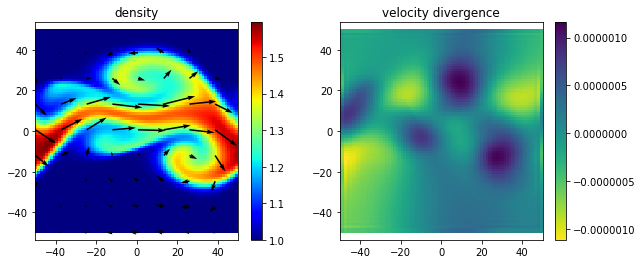


... speed_lim dt= 967.89468603  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 967.89468603
Taking step 301  with dt= 967.89468603 time= 221289.436536
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 969.572761988  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 969.572761988
Taking step 302  with dt= 969.572761988 time= 222257.331222
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 971.183333796  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 971.183333796
Taking step 303  with dt= 971.183333796 time= 223226.903984
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 972.782505604  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 972.782505604
Taking step 304  with dt= 972.782505604 time= 224198.087318
... project conver

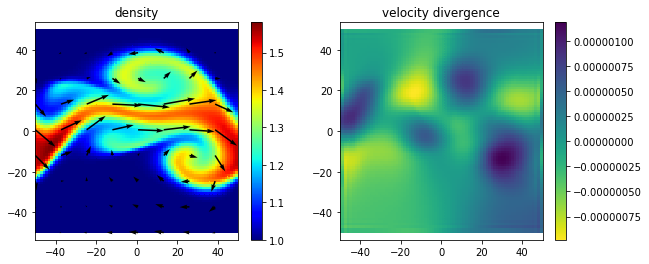


... speed_lim dt= 985.034441086  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 985.034441086
Taking step 311  with dt= 985.034441086 time= 231043.902917
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 986.892220181  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 986.892220181
Taking step 312  with dt= 986.892220181 time= 232028.937358
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 988.810803177  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 988.810803177
Taking step 313  with dt= 988.810803177 time= 233015.829578
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 990.66528178  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 990.66528178
Taking step 314  with dt= 990.66528178 time= 234004.640381
... project conver

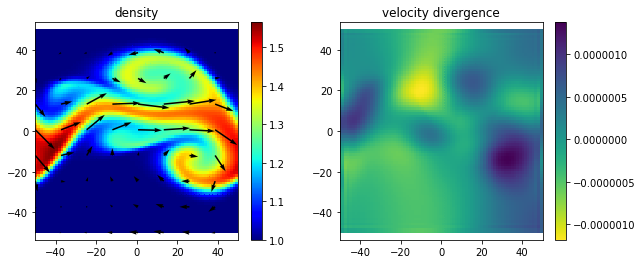


... speed_lim dt= 1003.42629196  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1003.42629196
Taking step 321  with dt= 1003.42629196 time= 240977.85726
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1005.25522545  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1005.25522545
Taking step 322  with dt= 1005.25522545 time= 241981.283552
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1007.11912081  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1007.11912081
Taking step 323  with dt= 1007.11912081 time= 242986.538778
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1008.69946569  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1008.69946569
Taking step 324  with dt= 1008.69946569 time= 243993.657898
... project conv

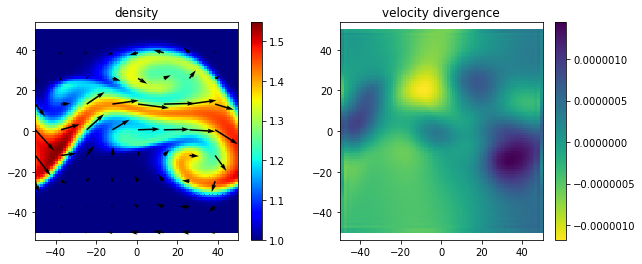


... speed_lim dt= 1019.43611029  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1019.43611029
Taking step 331  with dt= 1019.43611029 time= 251087.91801
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1020.82853266  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1020.82853266
Taking step 332  with dt= 1020.82853266 time= 252107.35412
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1022.01323519  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1022.01323519
Taking step 333  with dt= 1022.01323519 time= 253128.182653
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1023.23417765  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1023.23417765
Taking step 334  with dt= 1023.23417765 time= 254150.195888
... project conve

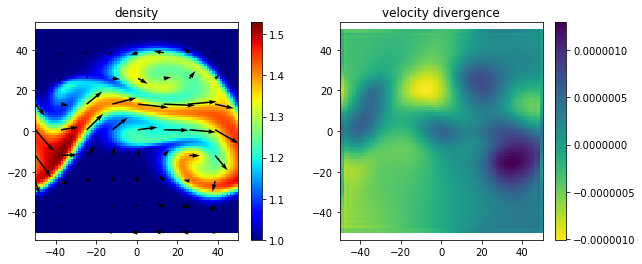


... speed_lim dt= 1031.237406  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1031.237406
Taking step 341  with dt= 1031.237406 time= 261337.671529
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1032.07614289  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1032.07614289
Taking step 342  with dt= 1032.07614289 time= 262368.908935
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1032.99175156  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1032.99175156
Taking step 343  with dt= 1032.99175156 time= 263400.985078
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1033.98891226  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1033.98891226
Taking step 344  with dt= 1033.98891226 time= 264433.97683
... project converged 

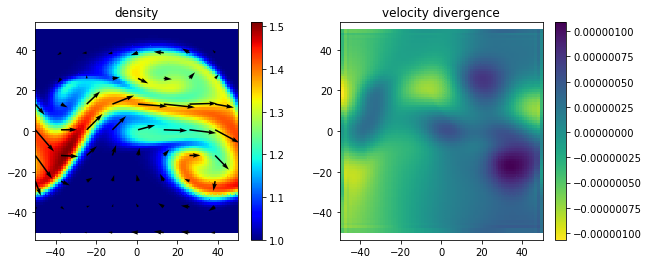


... speed_lim dt= 1041.69786898  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1041.69786898
Taking step 351  with dt= 1041.69786898 time= 271693.770179
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1042.80664346  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1042.80664346
Taking step 352  with dt= 1042.80664346 time= 272735.468048
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1044.03281302  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1044.03281302
Taking step 353  with dt= 1044.03281302 time= 273778.274691
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1045.37963226  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1045.37963226
Taking step 354  with dt= 1045.37963226 time= 274822.307504
... project con

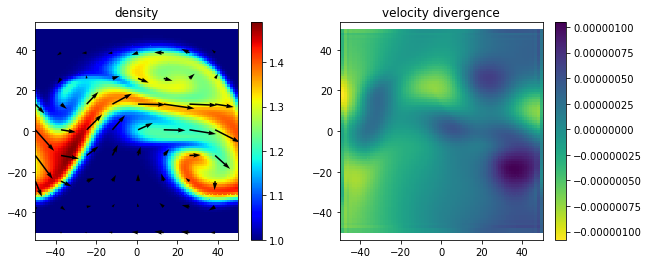


... speed_lim dt= 1056.77680374  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1056.77680374
Taking step 361  with dt= 1056.77680374 time= 282172.558302
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1058.79178137  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1058.79178137
Taking step 362  with dt= 1058.79178137 time= 283229.335105
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1060.75829738  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1060.75829738
Taking step 363  with dt= 1060.75829738 time= 284288.126887
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1062.6286144  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1062.6286144
Taking step 364  with dt= 1062.6286144 time= 285348.885184
... project conver

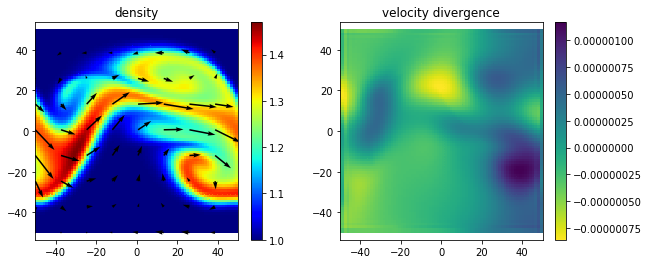


... speed_lim dt= 1077.684135  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1077.684135
Taking step 371  with dt= 1077.684135 time= 292831.99484
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1079.88903301  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1079.88903301
Taking step 372  with dt= 1079.88903301 time= 293909.678975
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1082.16091537  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1082.16091537
Taking step 373  with dt= 1082.16091537 time= 294989.568008
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1084.49761283  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1084.49761283
Taking step 374  with dt= 1084.49761283 time= 296071.728924
... project converged 

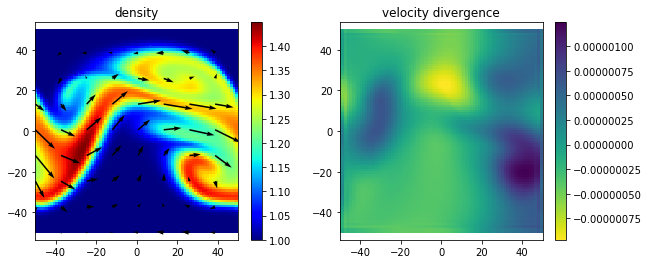


... speed_lim dt= 1099.26593717  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1099.26593717
Taking step 381  with dt= 1099.26593717 time= 303707.638306
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1100.94787803  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1100.94787803
Taking step 382  with dt= 1100.94787803 time= 304806.904243
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1102.65168345  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1102.65168345
Taking step 383  with dt= 1102.65168345 time= 305907.852121
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1104.39070357  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1104.39070357
Taking step 384  with dt= 1104.39070357 time= 307010.503804
... project con

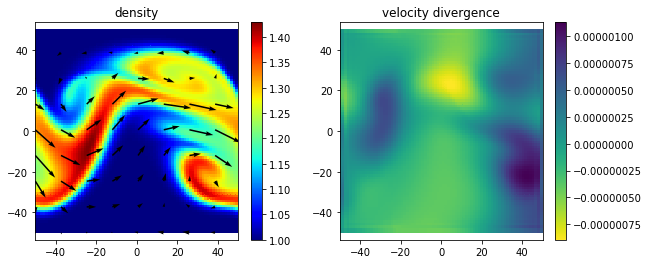


... speed_lim dt= 1115.52954281  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1115.52954281
Taking step 391  with dt= 1115.52954281 time= 314776.796723
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1117.10166361  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1117.10166361
Taking step 392  with dt= 1117.10166361 time= 315892.326266
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1118.73688748  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1118.73688748
Taking step 393  with dt= 1118.73688748 time= 317009.42793
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1119.80638574  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1119.80638574
Taking step 394  with dt= 1119.80638574 time= 318128.164817
... project conv

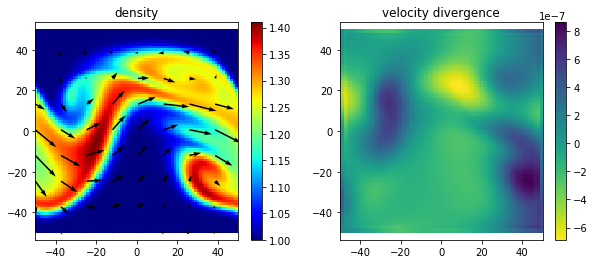


... speed_lim dt= 1128.70318796  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1128.70318796
Taking step 401  with dt= 1128.70318796 time= 325993.891059
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1130.01107658  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1130.01107658
Taking step 402  with dt= 1130.01107658 time= 327122.594247
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1131.48701474  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1131.48701474
Taking step 403  with dt= 1131.48701474 time= 328252.605323
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1133.03686332  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1133.03686332
Taking step 404  with dt= 1133.03686332 time= 329384.092338
... project con

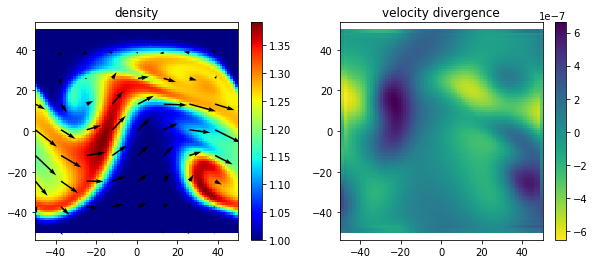


... speed_lim dt= 1142.95290441  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1142.95290441
Taking step 411  with dt= 1142.95290441 time= 337342.750503
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1144.56503142  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1144.56503142
Taking step 412  with dt= 1144.56503142 time= 338485.703407
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1146.42212987  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1146.42212987
Taking step 413  with dt= 1146.42212987 time= 339630.268439
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1148.53550205  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1148.53550205
Taking step 414  with dt= 1148.53550205 time= 340776.690568
... project con

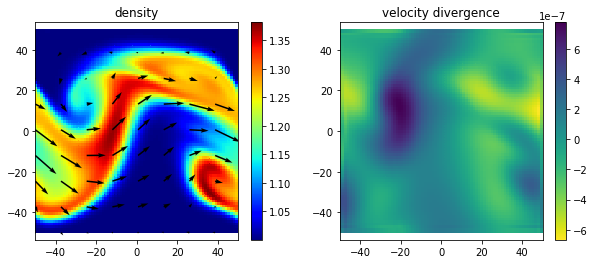


... speed_lim dt= 1165.37278224  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1165.37278224
Taking step 421  with dt= 1165.37278224 time= 348862.770925
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1167.75504078  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1167.75504078
Taking step 422  with dt= 1167.75504078 time= 350028.143707
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1170.43764636  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1170.43764636
Taking step 423  with dt= 1170.43764636 time= 351195.898748
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1173.42882343  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1173.42882343
Taking step 424  with dt= 1173.42882343 time= 352366.336395
... project con

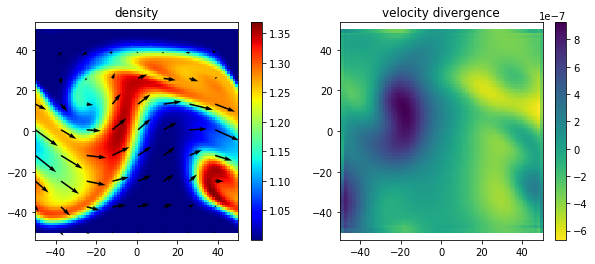


... speed_lim dt= 1196.890209  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1196.890209
Taking step 431  with dt= 1196.890209 time= 360649.059027
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1200.42880746  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1200.42880746
Taking step 432  with dt= 1200.42880746 time= 361845.949236
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1203.72696867  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1203.72696867
Taking step 433  with dt= 1203.72696867 time= 363046.378044
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1207.34701491  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1207.34701491
Taking step 434  with dt= 1207.34701491 time= 364250.105012
... project converged

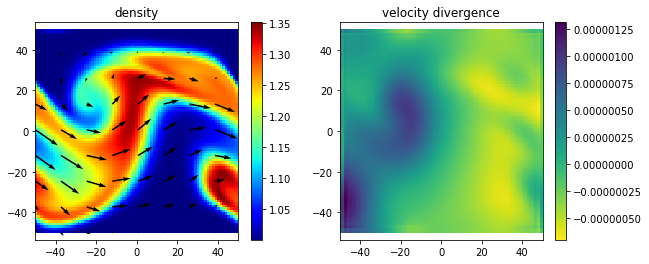


... speed_lim dt= 1234.72744616  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1234.72744616
Taking step 441  with dt= 1234.72744616 time= 372784.082847
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1239.29784764  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1239.29784764
Taking step 442  with dt= 1239.29784764 time= 374018.810293
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1242.60025308  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1242.60025308
Taking step 443  with dt= 1242.60025308 time= 375258.108141
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1246.01596399  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1246.01596399
Taking step 444  with dt= 1246.01596399 time= 376500.708394
... project con

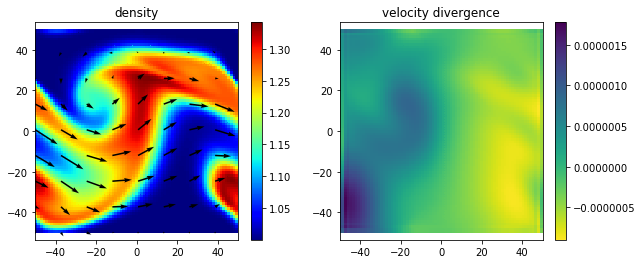


... speed_lim dt= 1268.38380324  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1268.38380324
Taking step 451  with dt= 1268.38380324 time= 385301.332426
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1266.63683643  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1266.63683643
Taking step 452  with dt= 1266.63683643 time= 386569.716229
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1265.18029405  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1265.18029405
Taking step 453  with dt= 1265.18029405 time= 387836.353065
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1263.69151378  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1263.69151378
Taking step 454  with dt= 1263.69151378 time= 389101.533359
... project con

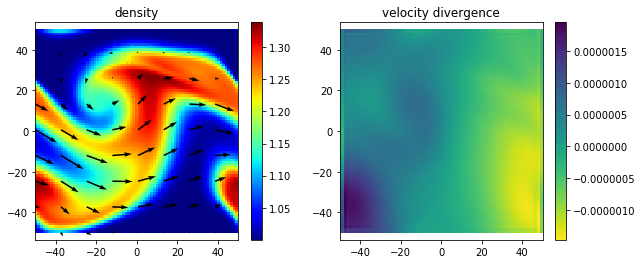


... speed_lim dt= 1252.76065839  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1252.76065839
Taking step 461  with dt= 1252.76065839 time= 397911.981486
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1251.81329192  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1251.81329192
Taking step 462  with dt= 1251.81329192 time= 399164.742145
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1251.15631056  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1251.15631056
Taking step 463  with dt= 1251.15631056 time= 400416.555437
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1250.02203867  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1250.02203867
Taking step 464  with dt= 1250.02203867 time= 401667.711747
... project con

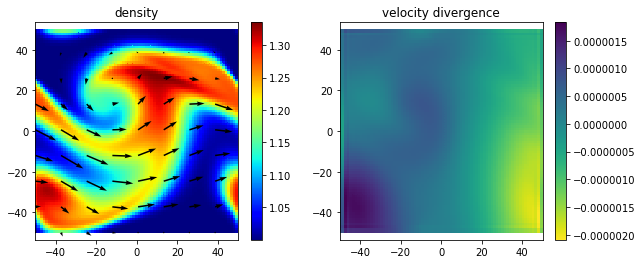


... speed_lim dt= 1246.78754487  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1246.78754487
Taking step 471  with dt= 1246.78754487 time= 410404.665433
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1247.08912564  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1247.08912564
Taking step 472  with dt= 1247.08912564 time= 411651.452978
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1247.15238146  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1247.15238146
Taking step 473  with dt= 1247.15238146 time= 412898.542104
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1247.2902367  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1247.2902367
Taking step 474  with dt= 1247.2902367 time= 414145.694485
... project conver

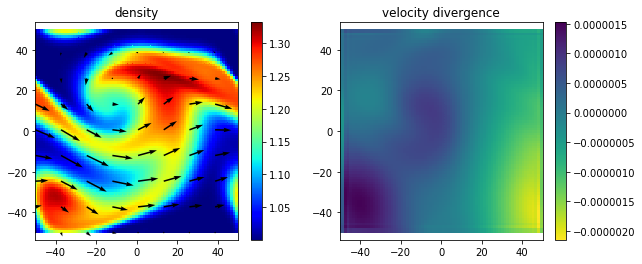


... speed_lim dt= 1251.71316638  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1251.71316638
Taking step 481  with dt= 1251.71316638 time= 422887.056163
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1252.44499529  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1252.44499529
Taking step 482  with dt= 1252.44499529 time= 424138.76933
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1253.39659342  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1253.39659342
Taking step 483  with dt= 1253.39659342 time= 425391.214325
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1254.56948373  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1254.56948373
Taking step 484  with dt= 1254.56948373 time= 426644.610919
... project conv

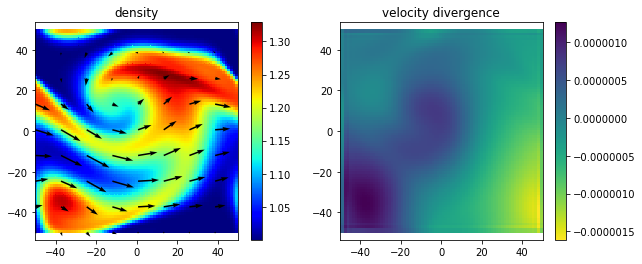


... speed_lim dt= 1264.5265478  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1264.5265478
Taking step 491  with dt= 1264.5265478 time= 435454.98686
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1266.33398073  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1266.33398073
Taking step 492  with dt= 1266.33398073 time= 436719.513408
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1268.37538307  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1268.37538307
Taking step 493  with dt= 1268.37538307 time= 437985.847388
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1270.65723618  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1270.65723618
Taking step 494  with dt= 1270.65723618 time= 439254.222771
... project converg

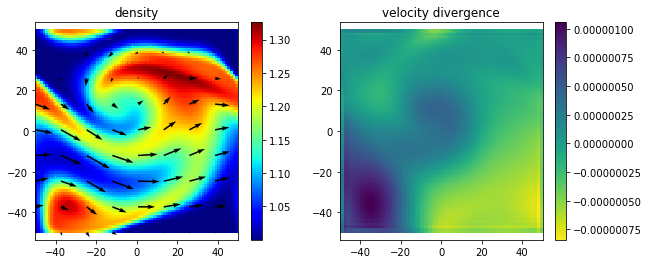


... speed_lim dt= 1289.47245225  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1289.47245225
Taking step 501  with dt= 1289.47245225 time= 448200.20374
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1292.89429586  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1292.89429586
Taking step 502  with dt= 1292.89429586 time= 449489.676193
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1296.58103734  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1296.58103734
Taking step 503  with dt= 1296.58103734 time= 450782.570489
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1300.18746329  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1300.18746329
Taking step 504  with dt= 1300.18746329 time= 452079.151526
... project conv

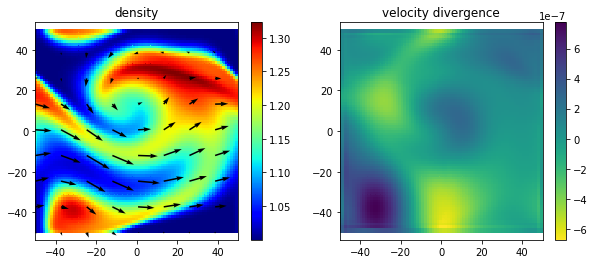


... speed_lim dt= 1332.18326566  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1332.18326566
Taking step 511  with dt= 1332.18326566 time= 461270.591662
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1337.58504033  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1337.58504033
Taking step 512  with dt= 1337.58504033 time= 462602.774928
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1343.26104163  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1343.26104163
Taking step 513  with dt= 1343.26104163 time= 463940.359968
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1349.20759584  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1349.20759584
Taking step 514  with dt= 1349.20759584 time= 465283.62101
... project conv

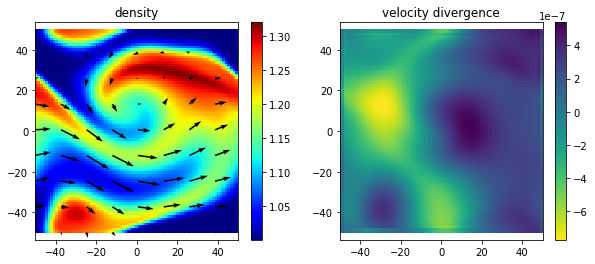


... speed_lim dt= 1394.14582548  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1394.14582548
Taking step 521  with dt= 1394.14582548 time= 474859.700893
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1400.94245107  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1400.94245107
Taking step 522  with dt= 1400.94245107 time= 476253.846719
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1407.89033263  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1407.89033263
Taking step 523  with dt= 1407.89033263 time= 477654.78917
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1414.6709258  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1414.6709258
Taking step 524  with dt= 1414.6709258 time= 479062.679503
... project converg

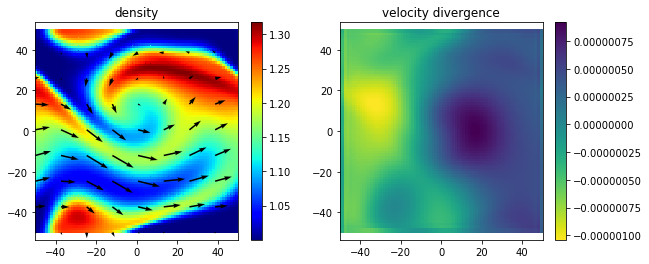


... speed_lim dt= 1461.54797738  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1461.54797738
Taking step 531  with dt= 1461.54797738 time= 489108.903538
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1467.73202591  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1467.73202591
Taking step 532  with dt= 1467.73202591 time= 490570.451515
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1473.89238828  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1473.89238828
Taking step 533  with dt= 1473.89238828 time= 492038.183541
... project converged after 1  steps
... project converged after 1  steps
... project converged after 1  steps

... speed_lim dt= 1480.01786367  accel_lim dt= inf  diff_lim dt= 2002.88415318 new dt = 1480.01786367
Taking step 534  with dt= 1480.01786367 time= 493512.07593
... project conv

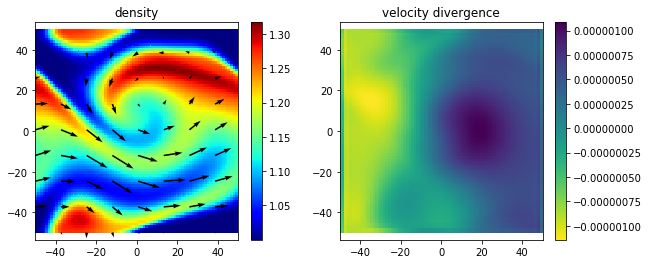

In [7]:
# Replace fluid code with fluidcodeforce 
#import FluidCodeForce as fluid

f = fluid.FluidFlow2D(ncells=80, xmin=-50, xmax=50,
                     solver_tolerence=1.e-4)

# gets the coordinate arrays
xx, yy = f.get_coords()

# setup an initial condition
vxo = zeros_like(xx)
vyo = zeros_like(xx)
dno = ones_like(xx)

# set higher density on the top
dno[yy > 2*sin(xx/6)**2 ] = 1
dno[yy < 10*sin(xx/6)**2 +10] = 2
dno[yy < 10*sin(xx/6)**2 -10]= 1
vxo[yy < 2*sin(xx/6)**2 ] = 0.001
vxo[yy < 10*sin(xx/6)**2 -10] = 0
vxo[yy > 2*sin(xx/6)**2 ] = 0.001
vxo[yy > 10*sin(xx/6)**2 +10] = 0

# send this initial condition to the code
diff_coeff = 0.0001
f.setup_initial_condition(vxo, vyo, dno, Diff_Coeff=diff_coeff, bctype='wrap')

f.make_monitoring_plots(velocity_vectors=True)

vxlist = []
vylist = []
dnlist = []
f.evolve_fluid(vxlist, vylist, dnlist, tmax = 500000, plot_every=10, save_every = 10, bctype= 'wrap')

The starting simulation patterns are similar if not the same as the Googled images of Kelvin-Helholtz. 

# PART C) ANIMATION 

In [10]:
import matplotlib.animation as animation
%matplotlib nbagg

<IPython.core.display.Javascript object>


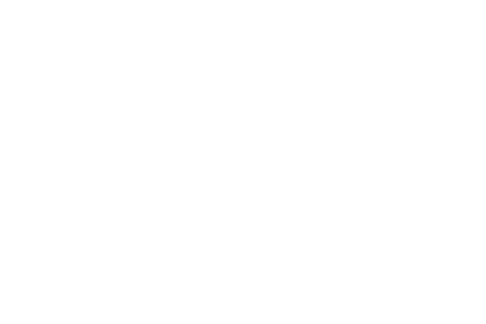

ValueError: Key animation.ffmpeg_path: path must be a (unicode) string

In [24]:
def make_dens_plot(i):
    """
    Make a plot of density. Plot every "stride"-th point as a velocity arrow on top. 
    """
    clf()
    # make the color plot
    pcolormesh(xx,yy,dnlist[i],cmap="rainbow")
    axis('equal')
    colorbar(label="density")
    xlabel("x-position")
    ylabel("y-position")
    return None
    #quiver(xx[::stride,::stride],yy[::stride,::stride],vxlist[i][::stride,::stride],vylist[i][::stride,::stride])
    #return None


# call make_dens_plot on an example frame:
#make_dens_plot(10)


anim = animation.FuncAnimation(fig1,make_dens_plot,interval=25,frames=len(dnlist), repeat=False)

#anim.save("ProjectTwo.mp4")
fig = figure()
close('all')
rcParams['animation.ffmpeg_path']='C:\\Users\\Andres\\Desktop\\jupyter notes\\earth 119\\ffmpeg-20160531-git-a1953d4-win64-static\\ffmpeg-20160531-git-a1953d4-win64-static\\bin\\ffmpeg.exe'
FFwriter = animation.FFMpegWriter()
anim.save("ProjectTwo2D.mp4", writer = FFwriter, fps=30)


The first code animation shows the progression of a stream of fluid is similar to a stream of water passing through a still body of water. As time progresses the fluids density blends with its surroundings displaying a mixture between two fluids of deifferent densities. As time progesses the pattern becomes more and more chaotic such as mixing two fluids of different density that begin to mix together. 



# PART D) EDDY ANIMATIONS 

# Vorticity

The curl of the vector field. E.g. how much of an eddy is there in the fluid, the direction of the curl, etc 

<IPython.core.display.Javascript object>


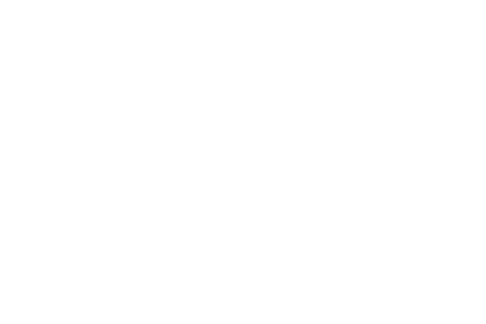

<IPython.core.display.Javascript object>


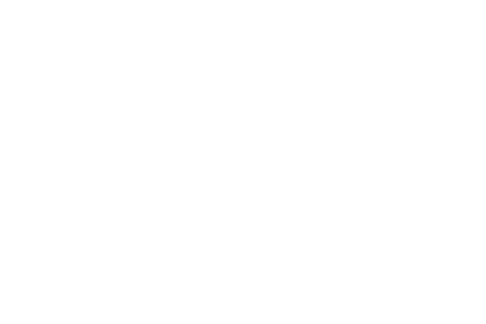

ValueError: Key animation.ffmpeg_path: path must be a (unicode) string

In [25]:
def vorticity(xx,yy,vx,vy):
    """
    The vorticity of a 2D velocity field -- uses finite differencing
    """
    dx = xx[1,0]-xx[0,0]
    vort = zeros_like(vx)
    vort[1:-1,1:-1] = 1./(2*dx) * ( (vy[2:,1:-1]-vy[:-2,1:-1]) - ( vx[1:-1,2:] - vx[1:-1,:-2]) )
    return vort

# This function makes a plot of the vorticity in frame (i)
def make_vorticity_plot(i):
    clf()
    pcolormesh(xx,yy, vorticity(xx,yy,vxlist[i],vylist[i]), cmap='PRGn' )
    axis('equal')
    colorbar(label="Vorticity")
    xlabel("x-position")
    ylabel("y-position")
    return None
make_vorticity_plot(10)

anim = animation.FuncAnimation(fig,make_vorticity_plot,
                               interval=100,
                               frames=len(dnlist),
                               repeat=False)
fig2 = figure(2)
# to save:
rcParams['animation.ffmpeg_path']='C:\\Users\\Andres\\Desktop\\earth 119\\ffmpeg-20160531-git-a1953d4-win64-static\\ffmpeg-20160531-git-a1953d4-win64-static\\bin\\ffmpeg.exe'
FFwriter = animation.FFMpegWriter()
anim.save("Vorticity.mp4", writer = FFwriter, fps=30)

Vorticity, loosely defined as the tendency for something in motion to rotate, works well in the application to our Kelvin Helmholtz stability flow animation in that it allows us to see the progression of "curling" that naturally occurs when two fluids meet at a plane at different velocities. We used the given equation for vorticity and used a two-dimensional indexing format to create a function of our formula. From there we created a for loop that created a new image/graph of the progression of the eddies using our vorticity function at different steps in time. We were then able to apply our newly made for loop to the FuncAnimation call imported from matplotlib.animation. Adjusting the frames and intervals accordingly to our parameters, we were able to successfully create an animation depicting the effects of instability flow over a period of approximately 500,000 seconds.